## week9 RSbasic assignment - 18기 이다인

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import operator

import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [2]:
movie = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


* 타이틀 칼럼에는 영화의 제목과 연도가 표시되어 있다.

In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


* 사용자가 관람한 영화에 대해 평점을 남긴 데이터는 ratings.csv에 저장되어 있다. 
* rating.csv에는 사용자 id와 영화 id, 평점과 timestamp 컬럼이 존재한다. 여기서 timestamp는 영화에 대한 평점을 기록한 시점을 의미한다.

In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


* tags.csv에는 사용자가 영화를 관람한 후 남긴 리뷰로부터 추출된 태그가 저장되어 있다. 
* tags.csv에는 사용자 id와 영화 id, 태그와 timestamp 컬럼이 존재한다. 여기서 timestamp는 영화에 대한 태그를 남긴 시점을 의미한다.

### 데이터 전처리

**결측치 및 중복 확인**

In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


* 모든 데이터에 결측치는 없는 것으로 확인되었다.

In [9]:
len(movie["movieId"].unique())

9742

* movie.csv에 중복된 영화는 없는지 확인해본 결과 중복된 결과는 없는 것으로 확인된다.

### 데이터EDA

#### 1. 연도별 영화 나타내기

* movie.csv에 영화 이름과 연도가 같이 표시 되어 있다. 따라서 연도를 별도 컬럼으로 분리한 후 연도별로 영화의 개수를 나타내 보려 한다.

In [10]:
movie['year'] = movie['title'].str.extract('(\(\d\d\d\d\))') 
movie.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)


In [11]:
movie['year'] = movie['year'].fillna('(0)')

In [12]:
movie['year'] = movie['year'].apply(lambda x: x.replace('(','').replace(')',''))
movie.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [13]:
movie["year"].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '0', '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

* 연도가 따로 표시되어 있지 않은 영화들은 0으로 표시해놓았다.
* 분리가 잘 된 것을 확인할 수 있다. 하지만 연도별로 영화를 나타내기엔 연도가 너무 많기에 10년 단위로 끊어서 나타내기로 하였다.

In [14]:
movie["year_0"] = movie["year"].apply(lambda x : x[-5 :-1] + "0")
movie.head()

,movieId,title,genres,year,year_0
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990


In [15]:
movie["year_0"].unique()

array(['1990', '1970', '1960', '1980', '1930', '1940', '1950', '1920',
       '2000', '1910', '1900', '0', '2010'], dtype=object)

In [16]:
movie_year = movie["year_0"].value_counts().sort_index()
movie_year

0         13
1900       3
1910       7
1920      37
1930     136
1940     197
1950     279
1960     401
1970     500
1980    1177
1990    2212
2000    2849
2010    1931
Name: year_0, dtype: int64

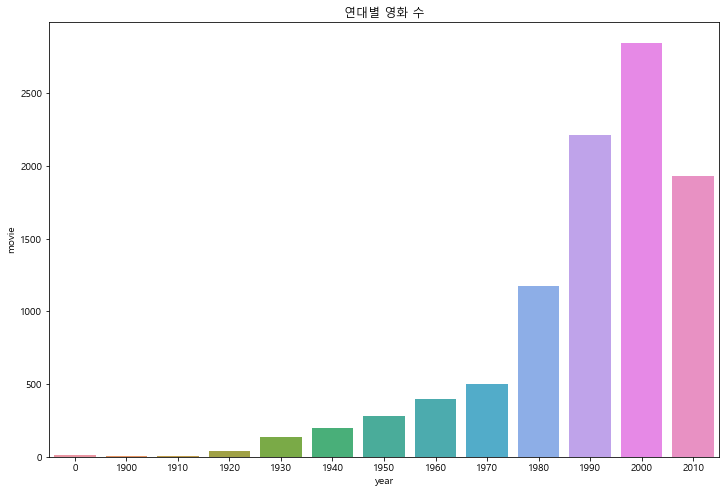

In [17]:
plt.figure(figsize=(12, 8))

plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(movie_year.index, movie_year.values)
plt.title("연대별 영화 수")
plt.xlabel("year")
plt.ylabel("movie")

plt.show()

* 2000년대에 가장 영화가 많이 출시된 것을 알 수 있고, 그 다음은 1990대 인 것을 알 수 있다.
* 또한 2010년을 제외하면 대체로 영화는 시간이 지날 수록 점점 많이 출시된 것을 알 수 있다.

#### 2. 장르별 영화 개수

In [18]:
# 장르들을 담을 딕셔너리
genre_dict = {}


for row in movie['genres'] : 
    genre = row.split("|")
    for genre_name in genre : 
        if (genre_name in genre_dict) == False :
            genre_dict[genre_name] = 1
        else :
            genre_dict[genre_name] = genre_dict[genre_name] + 1
            
genre_dict

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

* 영화의 장르가 | 를 통해 여러 장르로 표현되고 있기 때문에 각각의 장르 별 영화개수를 파악하기 위해 따로 딕셔너리를 만들어주었다.

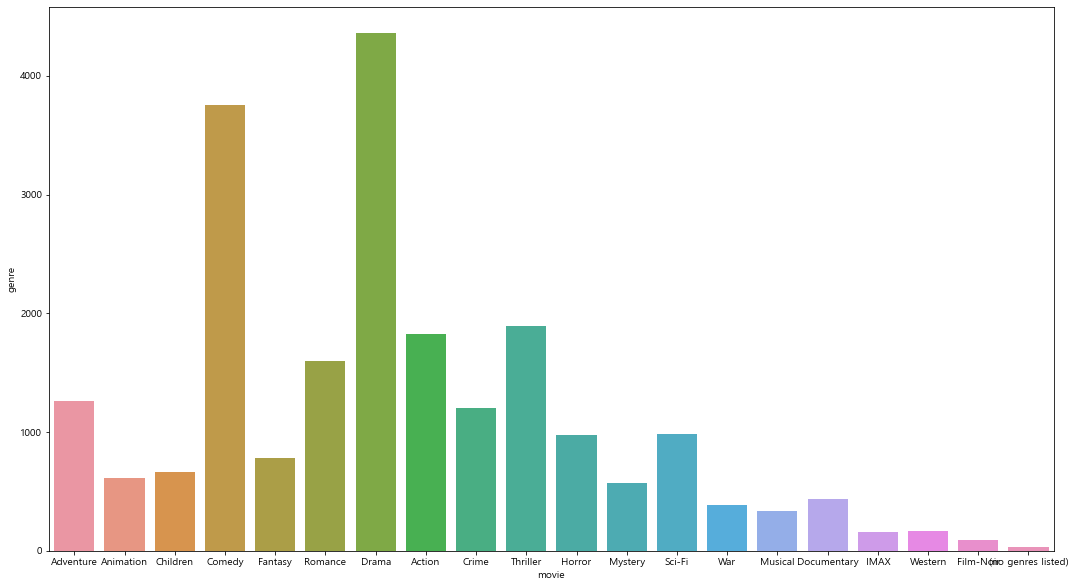

In [19]:
plt.figure(figsize=(18, 10))

x = list(genre_dict.keys())
y = list(genre_dict.values())
sns.barplot(x, y)
plt.xlabel("movie")
plt.ylabel("genre")
plt.show()

* 가장 많은 영화의 장르는 'drama' 인 것을 알 수 있고, 그 다음은 'comedy'인 것을 알 수 있다.
* 가장 적은 영화의 장르는 'film-noir' 즉 느와르 장르였다.

#### 3. 평점 분석

In [20]:
print('평점의 평균: ', rating['rating'].mean().round(4))
print('평점의 표준편차: ', rating['rating'].std().round(4))

평점의 평균:  3.5016
평점의 표준편차:  1.0425


* 평점의 평균은 3.5이고 표준편차가 1인 것으로 보아 대체로 사용자들이 2.5에서 4.5사이로 평점을 부여한다는 것을 알 수 있다.

<AxesSubplot:xlabel='rating'>

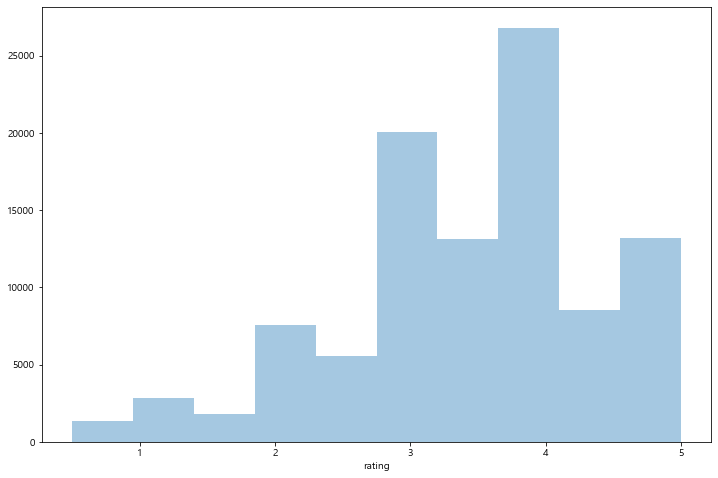

In [21]:
plt.figure(figsize=(12, 8))

sns.distplot(rating['rating'], bins=10, hist=True, kde=False)

* 평점은 대체로 4점대가 가장 높고 오른쪽을 치우친 경향을 보인다. 또한 대부분의 사용자들이 영화 평점을 3점 이상은 준다는 것을 알 수 있다.

#### 4. 영화 평점과 시청한 횟수에 따른 관계

* 사람들이 많이 본 영화가 더 높은 평점을 가지고 있을지 확인해보려고 한다.

In [22]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': rating.groupby('movieId')['userId'].count(),
    'avg_ratings': rating.groupby('movieId')['rating'].mean()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
movieid_user_df.head()

(9724, 3)


,movieId,num_users_watch,avg_ratings
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429


* 영화별로 시청한 횟수와 평균 평점을 나타내주었다.

In [23]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)

,movieId,num_users_watch,avg_ratings
314,356,329,4.164134
277,318,317,4.429022
257,296,307,4.197068
510,593,279,4.161290
1938,2571,278,4.192446
...,...,...,...
3053,4093,1,1.500000
3049,4089,1,2.000000
6687,58351,1,4.000000
3045,4083,1,4.000000


In [24]:
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 100].count()

9586

* 영화를 시청한 횟수가 너무 다양하기 때문에 시청횟수 100번 이상인 경우만 시각화를 진행해보았다.

In [25]:
idx_num_100 = movieid_user_df[movieid_user_df['num_users_watch'] <= 100].index
movieid_user_df = movieid_user_df.drop(idx_num_100, axis=0)
movieid_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 7355
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movieId          134 non-null    int64  
 1   num_users_watch  134 non-null    int64  
 2   avg_ratings      134 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 4.2 KB


<AxesSubplot:xlabel='num_users_watch', ylabel='avg_ratings'>

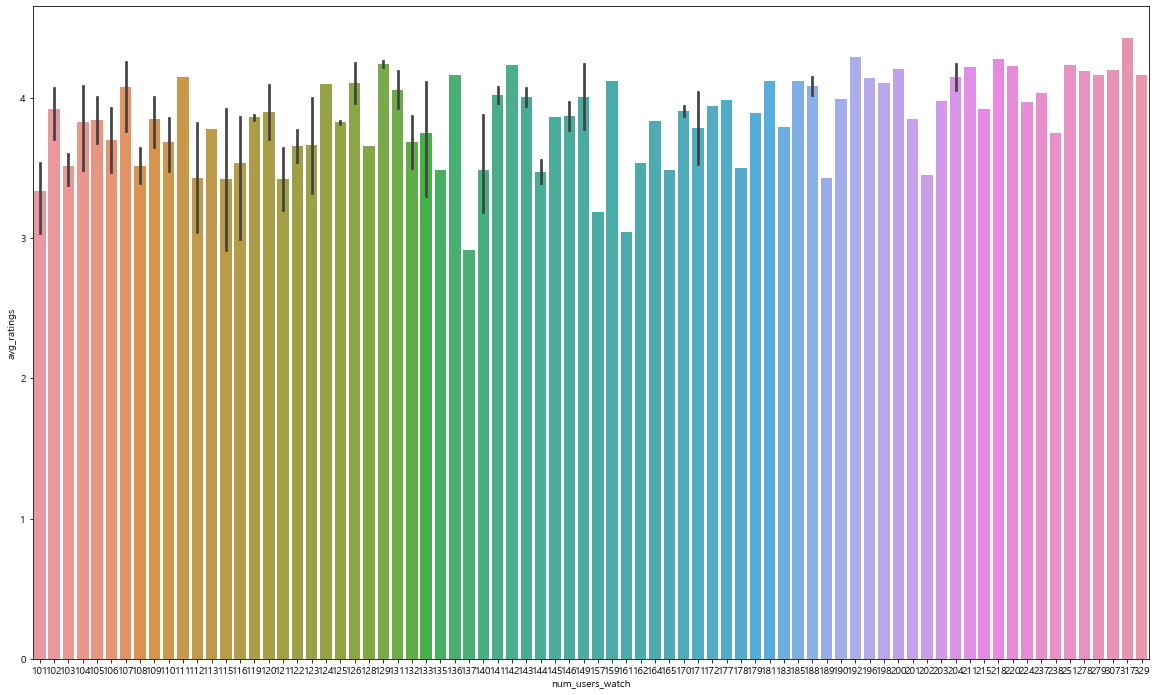

In [26]:
plt.figure(figsize=(20, 12))
sns.barplot(data=movieid_user_df,
            x="num_users_watch",
            y="avg_ratings")

* 시각화를 도출해본 결과 영화를 많이 시청했다고 평점이 높은 것은 아니라는 것을 알 수 있으며, 시청 횟수에 따른 평점은 다양한 것을 알 수 있었다.

#### 5. 특정 사용자 분석

* 먼저 영화 평점을 0.5이하로 준 사용자들의 특성을 분석해보기 위해 따로 나타내보았다.

In [27]:
rating['userId'][rating.rating <= 0.5].count()

1370

In [28]:
rating['userId'][rating.rating < 0.5].count()

0

* 평점이 0.5인 경우가 1370건 있는 것을 확인할 수 있었고, 그 이하인 평점은 없는 것을 확인하였다.

In [29]:
idx_rating = rating[rating.rating <= 0.5]

In [30]:
idx_rating.drop('timestamp', axis = 'columns')

,userId,movieId,rating
261,3,31,0.5
262,3,527,0.5
263,3,647,0.5
264,3,688,0.5
265,3,720,0.5
...,...,...,...
99394,608,6827,0.5
99408,608,7004,0.5
100345,610,61818,0.5
100415,610,72424,0.5


In [31]:
idx_rating['userId'].unique()

array([  3,   7,  10,  18,  20,  21,  22,  28,  34,  36,  41,  47,  50,
        51,  55,  63,  64,  66,  68,  75,  76,  78,  83,  88,  89,  91,
        98, 103, 104, 105, 111, 112, 114, 116, 124, 125, 127, 129, 132,
       138, 139, 140, 146, 147, 153, 154, 159, 160, 161, 167, 168, 175,
       177, 182, 184, 187, 193, 200, 204, 207, 210, 215, 219, 220, 221,
       223, 226, 230, 232, 239, 249, 250, 256, 258, 259, 260, 261, 274,
       286, 287, 292, 295, 298, 301, 305, 307, 308, 309, 310, 311, 320,
       322, 326, 328, 329, 330, 331, 334, 335, 344, 354, 358, 359, 365,
       375, 377, 380, 382, 387, 390, 393, 396, 399, 406, 413, 414, 416,
       418, 419, 421, 426, 427, 428, 431, 432, 434, 438, 441, 442, 448,
       449, 461, 462, 473, 474, 477, 478, 480, 482, 483, 487, 488, 489,
       490, 495, 499, 502, 503, 506, 510, 514, 517, 518, 522, 525, 528,
       537, 539, 542, 543, 550, 551, 552, 557, 560, 567, 570, 573, 578,
       580, 583, 590, 594, 598, 599, 600, 606, 608, 610], dtype=

<AxesSubplot:xlabel='userId', ylabel='count'>

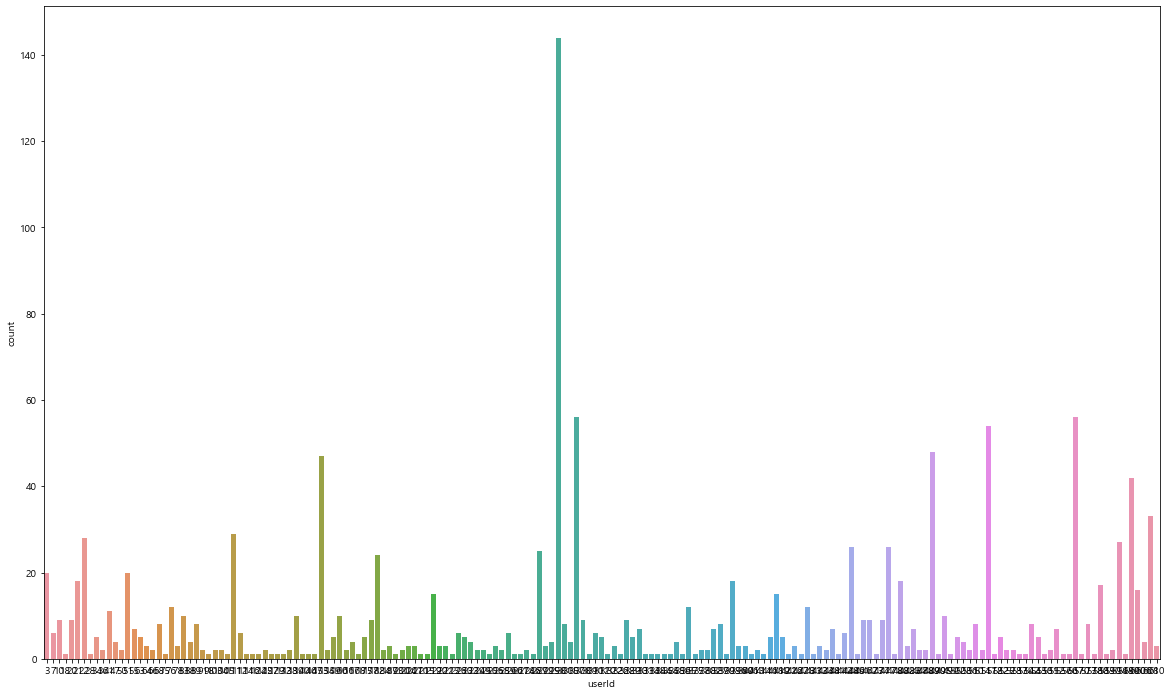

In [32]:
plt.figure(figsize=(20, 12))
sns.countplot(data=idx_rating, x="userId")

* 영화 평점을 0.5이하로 준 사용자들이 총 몇 건의 영화를 0.5로 주었는지 시각화 해본 결과 눈에 띄게 평점을 낮게 주는 사용자가 있는 것을 확인하였고, 그 사용자의 특성을 파악해보기 위해 따로 확인해보았다.

In [33]:
idx_rating['userId'].value_counts()

298    144
567     56
307     56
517     54
489     48
      ... 
421      1
146      1
147      1
414      1
431      1
Name: userId, Length: 179, dtype: int64

In [34]:
idx_rating[idx_rating.userId == 298]

,userId,movieId,rating,timestamp
44536,298,2,0.5,1450452897
44573,298,653,0.5,1453033338
44582,298,886,0.5,1479058140
44588,298,1107,0.5,1479065495
44648,298,1882,0.5,1476643184
...,...,...,...,...
45460,298,138798,0.5,1450453125
45466,298,140711,0.5,1478816387
45469,298,149352,0.5,1466277933
45470,298,149354,0.5,1466277836


In [35]:
user_ = rating[rating.userId == 298]
user_

,userId,movieId,rating,timestamp
44535,298,1,2.0,1447518257
44536,298,2,0.5,1450452897
44537,298,16,4.0,1447597782
44538,298,32,4.0,1450369288
44539,298,47,4.0,1447518037
...,...,...,...,...
45469,298,149352,0.5,1466277933
45470,298,149354,0.5,1466277836
45471,298,156371,3.5,1466277191
45472,298,156609,0.5,1479058487


<AxesSubplot:xlabel='rating'>

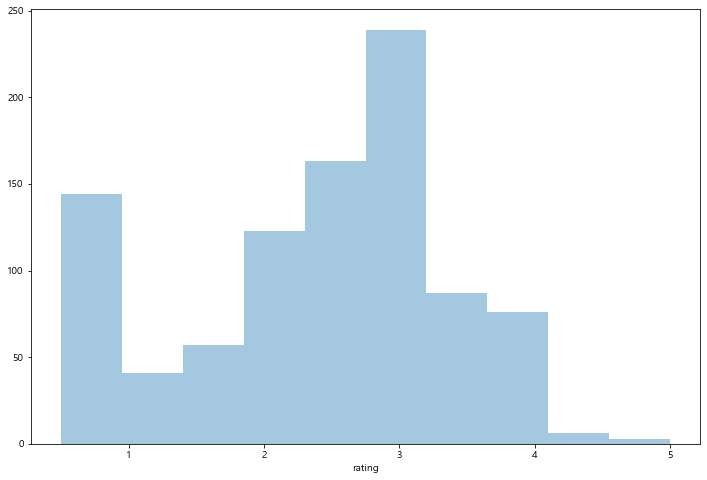

In [36]:
plt.figure(figsize=(12, 8))

sns.distplot(user_['rating'], bins=10, hist=True, kde=False)

* 영화 평점을 0.5로 준 횟수가 가장 많은 사용자인 '298' 사용자는 대부분의 영화에 평점을 낮게 주었을 거라 예상한 바와는 다르게 생각보다 높은 평점도 많이 준 것을 확인할 수 있었다.

### Memory cf 2개 이상

* 먼저 CF를 진행해주기 전에 가장 많이 사용할 rating데이터를 딕셔너리 형태로 변화해주었다.
* 딕셔너리 형태로 변환해주는 이유는 데이터 프레임을 사용하는 것에 비해 계산 성능이 향상 되기 때문이다.

In [37]:
ratings=[]
with open('ratings.csv','r',encoding='UTF-8') as f:
    for line in f.readlines():
        ratings.append(line.strip().split(","))
        
pd.DataFrame(np.array(ratings[1:10]),columns=ratings[0])

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041


In [38]:
def rating_dictionary(ratings):
    r_dict = {}
    for i in ratings[1:]:
        if i[0] not in r_dict.keys():
            r_dict[i[0]]={i[1]:float(i[2])}
        else:
            r_dict[i[0]].setdefault(i[1],float(i[2]))
    return r_dict

In [39]:
r_dict = rating_dictionary(ratings)

**코사인 유사도를 구하는 함수**

In [40]:
def cosine_similarity(A,B):
    dot_p = np.dot(A,B)
    A_norms = math.sqrt(sum([i**2 for i in A]))
    B_norms = math.sqrt(sum([i**2 for i in B]))
    AB_norms = A_norms * B_norms
    
    return dot_p / AB_norms

#### 1. User Based - 사용자 기반 필터링

* 유사도는 위에서 만들어 놓은 함수와 같이 코사인 유사도를 사용하며, KNN기법을 사용하여 특정 유저에 대한 추천 영화 예측을 진행해보려고 한다.

In [41]:
all_m=[i[0] for i in movie[1:]]

def user_based_filtering(rating_dict, person, similarity=cosine_similarity, k=3):
    
    #1. 내가 알고싶은 사용자 즉 person과 다른 사용자들 둘 다 평가한 영화를 토대로 유사도를 구함
    person_m = set(rating_dict[person].keys()) # person이 시청한 영화.
    similar_score={} # 유사도 결과를 저장
    
    for other_person in rating_dict.keys():
        both_m = person_m.intersection(set(rating_dict[other_person].keys()))
        if len(both_m) >= 1: #공통된 영화가 1개 이상인 경우에만 유사도를 구할 수 았기 때문에 조건 추가
    #2. person의 both_m 평가점수와 other_person의 both_m에 대한 평가점수 사이의 유사도를 구함
            person_m_rating = [rating_dict[person][i] for i in both_m]
            other_person_m_rating = [rating_dict[other_person][i] for i in both_m]
            score= cosine_similarity(person_m_rating, other_person_m_rating)
            similar_score[other_person]=score
                 
    #3. 유사도를 내림차순으로 정렬하며 유사도 기반 이웃들을 생성
    neighborhood=sorted(similar_score.items(), key=operator.itemgetter(1), reverse=True)
    print("사용자와의 유사도 : \n\n",neighborhood[:50])
    
    #4. person이 평가하지 않은 아이템들을 추출하고, 그 아이템을 평가한 유사도 기준 이웃 k 명의 평가를 토대로 가중평균을 구함
    people_for_recommendation = [i[0] for i in neighborhood] 
    no_watch_m = set(all_m) - person_m 
    recommendation_of_movies = {} # 추천 결과
    a=1
    for movies in no_watch_m:
        r=[]
        s=[]
        for person in people_for_recommendation: 
            if movies in rating_dict[person].keys():
                r.append(rating_dict[person][movies]*similar_score[person])
                s.append(similar_score[person])
            else:
                continue
        if (sum(r) == 0) | (sum(s)== 0) : # 내가 평가하지 않은 아이템에 누구도 평가하지 않았다면 통과
            continue
        elif len(r) <= k: # k 보다 적은 경우에는 존재하는 사용자들끼리의 가중평균을 구함
            recommendation_of_movies[movies] = sum(r)/sum(s) # 하나의 영화에 대한 예측 평점
        else: # k 보다 아이템에 평가한 사용자가 많다면 k 까지만의 평점을 가지고 가중평균을 구함
            recommendation_of_movies[movies] = sum(r[:k])/sum(s[:k]) # 하나의 영화에 대한 예측 평점
        
    
    return sorted(recommendation_of_movies.items(), key=operator.itemgetter(1), reverse=True)[:1000]

In [42]:
# 사용자 1을 기준으로 유사도를 구함(similarity와 k는 디폴트값으로 지정)
recommendation_user = user_based_filtering(r_dict, '1')

사용자와의 유사도 : 

 [('1', 1.0), ('77', 1.0), ('85', 1.0), ('184', 1.0), ('245', 1.0), ('253', 1.0), ('291', 1.0), ('315', 1.0), ('358', 1.0), ('383', 1.0), ('388', 1.0), ('12', 0.9999999999999999), ('2', 0.9999999999999998), ('511', 0.999193447324659), ('278', 0.9988130559615213), ('550', 0.9986560262721613), ('366', 0.9986331420538472), ('472', 0.9986178293325098), ('459', 0.9981149841863163), ('114', 0.9980597354377347), ('65', 0.9978250350798125), ('259', 0.9970544855015816), ('49', 0.9969629303492418), ('258', 0.9965457582448797), ('180', 0.9962866000353438), ('523', 0.9962049198956219), ('538', 0.9959100033104784), ('53', 0.9958705948858224), ('9', 0.9957385837170334), ('300', 0.9955079780599657), ('398', 0.9951003121457859), ('401', 0.9949526491606236), ('360', 0.9949366763261819), ('189', 0.994908573123846), ('530', 0.9948934062566152), ('154', 0.9948057871850503), ('319', 0.9942824919679822), ('13', 0.9942815218442164), ('582', 0.9940251572134323), ('25', 0.9939759036144576), ('515

#### 2. Item Based - 아이템 기반 필터링

In [43]:
def item_based_filtering(rating_dict, person, similarity=cosine_similarity, k=3):
# 평가하지 않은 모든 영화와 평가한 영화 사이의 예측 평점을 모두 구하면서 평가하지 않은 영화마다 예측평점을 구함
# 내림차순으로 출력한다.
    tmp = [list(r_dict[i].keys()) for i in list(r_dict.keys())] 
    no_rating_m = list(set([j for i in tmp for j in i])) # 평가하지 않은 모든 영화
    rating_m = [i for i in list(rating_dict[person].keys())] # 평가한 모든 영화

    # 1. 아이템 간의 유사도를 모두 구함
    c_s={}
    
    for i in no_rating_m:
        c_s[i]={}
        for j in rating_m:
            p_i=[]
            p_j=[]
            for p in list(rating_dict.keys()):
                if j in rating_dict[p].keys() and i in rating_dict[p].keys():
                    p_i.append(rating_dict[p][i])
                    p_j.append(rating_dict[p][j])
            if len(p_i)>0:
                c=cosine_similarity(p_i, p_j)
                c_s[i].setdefault(j,c)
    
    # 2. 평가하지 않은 모든 영화에 대해 예측 평점을 구함
    result = {}
    for i in list(c_s.keys()):
        sum_sim_rating=[]
        sum_sim=[]
        k_i_j = sorted(c_s[i].items(), key=operator.itemgetter(1), reverse=True)[:k]
        
        for j in k_i_j:
            sum_sim.append(j[1])
            sum_sim_rating.append(j[1]*rating_dict[person][j[0]])
            
        if len(sum_sim) > 0:
            result[i]=sum(sum_sim_rating)/sum(sum_sim)
            
    return sorted(result.items(), key=operator.itemgetter(1), reverse=True)

            

In [44]:
recomendation_item = item_based_filtering(r_dict, '1', similarity=cosine_similarity, k=3)

In [45]:
recomendation_item

[('1199', 5.000000000000001),
 ('1200', 5.000000000000001),
 ('934', 5.0),
 ('34164', 5.0),
 ('555', 5.0),
 ('564', 5.0),
 ('6290', 5.0),
 ('176', 5.0),
 ('537', 5.0),
 ('1498', 5.0),
 ('2249', 5.0),
 ('1365', 5.0),
 ('1041', 5.0),
 ('41', 5.0),
 ('175585', 5.0),
 ('2492', 5.0),
 ('12', 5.0),
 ('1028', 5.0),
 ('1519', 5.0),
 ('2019', 5.0),
 ('73017', 5.0),
 ('125', 5.0),
 ('4085', 5.0),
 ('4225', 5.0),
 ('96964', 5.0),
 ('193571', 5.0),
 ('43460', 5.0),
 ('1188', 5.0),
 ('113604', 5.0),
 ('828', 5.0),
 ('5522', 5.0),
 ('1150', 5.0),
 ('127202', 5.0),
 ('3983', 5.0),
 ('3755', 5.0),
 ('339', 5.0),
 ('2524', 5.0),
 ('2312', 5.0),
 ('249', 5.0),
 ('56156', 5.0),
 ('6808', 5.0),
 ('6063', 5.0),
 ('81591', 5.0),
 ('6358', 5.0),
 ('63479', 5.0),
 ('3066', 5.0),
 ('104283', 5.0),
 ('86332', 5.0),
 ('160438', 5.0),
 ('183911', 5.0),
 ('104875', 5.0),
 ('191005', 5.0),
 ('162606', 5.0),
 ('6548', 5.0),
 ('3697', 5.0),
 ('7018', 5.0),
 ('6835', 5.0),
 ('538', 5.0),
 ('114662', 5.0),
 ('1432', 5.

### Model Based CF 2개 이상

#### Latent factor Based(잠재 요인 기반)

* model based cf중 잠재 요인 기반 기법을 이용하여 특정 영화와 비슷한 영화를 추천해주는 시스템을 만들어보려고 한다.
* 먼저 필요없는 컬럼을 삭제해준다.

In [46]:
movie.drop('genres', axis = 1, inplace = True)
movie.head()

,movieId,title,year,year_0
0,1,Toy Story (1995),1995,1990
1,2,Jumanji (1995),1995,1990
2,3,Grumpier Old Men (1995),1995,1990
3,4,Waiting to Exhale (1995),1995,1990
4,5,Father of the Bride Part II (1995),1995,1990


In [47]:
ratingdf = pd.read_csv('ratings.csv')
ratingdf.drop('timestamp', axis = 1, inplace = True)
ratingdf.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [48]:
movie_rating = pd.merge(ratingdf, movie, on = 'movieId')
movie_rating.head()

,userId,movieId,rating,title,year,year_0
0,1,1,4.0,Toy Story (1995),1995,1990
1,5,1,4.0,Toy Story (1995),1995,1990
2,7,1,4.5,Toy Story (1995),1995,1990
3,15,1,2.5,Toy Story (1995),1995,1990
4,17,1,4.5,Toy Story (1995),1995,1990


In [49]:
movie_rating = movie_rating.pivot_table('rating', index='userId', columns='title').fillna(0)
movie_rating.shape

(610, 9719)

In [50]:
movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
movie_rating_t = movie_rating.values.T
movie_rating_t.shape

(9719, 610)

In [52]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_rating_t)
matrix.shape

(9719, 12)

In [53]:
matrix[0]

array([ 0.55545972,  0.80875468, -0.37067598, -0.06661729,  0.63042307,
       -1.01122574, -0.251226  , -0.8342664 , -0.77948699,  0.24408509,
       -0.54149187,  0.67399304])

In [54]:
corr = np.corrcoef(matrix)
corr.shape

(9719, 9719)

* 이렇게 구해준 상관계수를 통해서 특정 영화와 상관계수가 높은 영화를 추출해준다.

In [55]:
movie_title = movie_rating.columns
movie_title_l = list(movie_title)
Toy_Story = movie_title_l.index('Toy Story (1995)')

In [56]:
corr_Toy_Story = corr[Toy_Story]
list(movie_title[corr_Toy_Story >= 0.9])[:10]

['Aladdin (1992)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Batman (1989)',
 'Beauty and the Beast (1991)',
 'Forrest Gump (1994)',
 'Ghost (1990)',
 'Home Alone (1990)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Jumanji (1995)']

* Toy Story와 상관계수가 높은 영화를 추출해본 결과 `알라딘`, `나 홀로 집에`, `미녀와 야수` 등이 추출된 것으로 보아 어느 정도 학습이 잘 되었다고 판단해볼 수 있다.